# Explorative Data Analysis <a id='Explorative_Data_Analysis'></a>

### 1 Table of Contents<a id='Contents'></a>
* [Explorative Data Analysis](#Explorative_Data_Analysis)
  * [1 Contents](#Contents)
  * [2 Introduction](#2_Introduction)
      * [2.1 Recap](#2.1_Recap)
      * [2.2 Next Steps](#2.2_Next_Steps)
  * [3 Imports](#3_Imports)
  * [4 Load Data](#4_Load_Data)
  * [5 Looking at the Data](#5_Looking_at_the_Data)
      * [5.1 Scaling the Data](#5.1_Scaling_the_data)
      * [5.2 Correlations](#5.2_Correlations)
      * [5.3 Indexes vs Power](#5.3_Indexes_vs_Power)
  * [6 Target Variable](#6_Target_Variable)
      * [6.1 Histograms](#6.1_Histograms)
      * [6.2 New Features](#6.2_New_Feature)
      * [6.3 P_GEN](#6.3_P_GEN)
  * [7 Save Data](#7_Save_Data)
  * [8 Conclusion](#8_Conclusion)


### 2 Introduction<a id='2_Introduction'></a>

#### 2.1 Recap<a id='2.1_Recap'></a>

In the last step, we cleaned our data. We removed null values and dropped erroneous values. Initially, our data was in two different datasets, weather and power. We joined those two datasets on the time the measurements were taken. Our data is now ready to do some deep dives on our features. 

#### 2.2 Next Steps<a id='2.2_Next_Steps'></a>

In this notebook, we will look closer at the correlations between our features and their relationship to our target variable, P_GEN. The solar installations where our data comes from are not the same size, so the P_GEN values will also have to be scaled adequately. Let's take a look!

### 3 Imports<a id='3_Imports'></a>

In [7]:
#import warnings
#warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas_profiling
from library.sb_utils import save_file
import os
import math
import csv

### 4 Load Data<a id='4_Load_Data'></a>

In [8]:
YMCA = pd.read_csv('../data/YMCA.csv')
ForestRoad = pd.read_csv('../data/ForestRoad.csv')
MapDriveEast = pd.read_csv('../data/MapleDriveEast.csv')
UK_data = pd.read_csv('../data/UK_data.csv')

The UK_data is the combination of data from all three sites: YMCA, Forest Road, and Maple Drive East.

### 5 Looking at the Data<a id='5_Looking_at_the_Data'></a>

In [9]:
UK_data.head()

,Unnamed: 0,Site,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,P_GEN,Temp_Pressure_ratio,Humidity_Radiation_ratio
0,0,YMCA,14.1,91.0,12.6,0,0.0,14.1,14.1,14.1,755.5,0.0,0.0,11.0,0.47,0.014,0.018663,8.272727
1,1,YMCA,14.1,91.0,12.7,0,0.0,14.1,14.2,14.2,755.5,0.0,0.0,23.0,0.99,0.067,0.018663,3.956522
2,2,YMCA,14.4,91.0,12.9,0,0.0,14.4,14.4,14.4,755.7,0.0,0.0,34.0,1.46,0.216,0.019055,2.676471
3,3,YMCA,15.1,86.0,12.7,0,0.0,15.1,15.1,15.1,755.8,0.0,0.0,57.0,2.45,0.256,0.019979,1.508772
4,4,YMCA,16.0,77.0,12.0,0,0.0,16.0,15.9,15.9,756.2,0.0,0.0,56.0,2.41,0.284,0.021158,1.375000


In [10]:
UK_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11846.0,5922.500000,3419.789979,0.000000,2961.250000,5922.500000,8883.750000,1.184500e+04
TempOut,11846.0,17.354001,4.015850,1.100000,14.600000,17.200000,19.900000,3.280000e+01
OutHum,11846.0,74.827706,14.671047,29.000000,64.000000,77.000000,87.000000,9.800000e+01
DewPt,11846.0,12.487675,2.848155,0.200000,10.500000,12.500000,14.600000,2.020000e+01
WindSpeed,11846.0,1.292504,1.507305,0.000000,0.000000,1.000000,2.000000,9.000000e+00
WindRun,11846.0,0.646252,0.753653,0.000000,0.000000,0.500000,1.000000,4.500000e+00
WindChill,11846.0,17.342875,4.031489,1.100000,14.600000,17.200000,19.900000,3.280000e+01
HeatIndex,11846.0,17.359666,4.078058,1.000000,14.500000,17.200000,19.900000,3.490000e+01
THWIndex,11846.0,17.348480,4.093832,1.000000,14.500000,17.200000,19.900000,3.490000e+01
Bar,11846.0,758.063034,5.837764,735.400000,754.700000,758.700000,762.400000,7.696000e+02


#### 5.1 Scaling the Data<a id='5.1_Scaling_the_Data'></a>

We should take a moment to look at the site specific power generation data

In [11]:
UK_data['Rain'].value_counts()

0.00    11736
0.25       81
0.51       14
1.02        5
1.27        4
0.76        4
2.54        1
2.79        1
Name: Rain, dtype: int64

In [5]:
UK_data.groupby(by='Site')['P_GEN'].describe()

,count,mean,std,min,25%,50%,75%,max
Site,,,,,,,,
Forest Road,5526.0,0.483572,0.714115,0.001,0.002,0.088,0.733,3.008
Maple Drive East,2579.0,1.000770,0.912627,0.000,0.234,0.717,1.574,3.884
YMCA,3741.0,0.101918,0.100662,0.000,0.021,0.063,0.158,0.444


YMCA is generating much less power than the other two sites. Is this because of the weather conditions? No, instead this can be explained by the smaller size of the installation at the YMCA site. In fact, all of the installations are off different sizes. The G83 register, a part of the UK Power Networks, reports the sizes of solar installations. Forest Road, Maple Drive East, and YMCA are registered at sizes of 3.29kW, 3.83kW, and 0.6kW respectively.

Feeding the data to our model before dealing with the discrepency in installation sizes would mean our models results would be useless. The choice I am making here is to scale down the Forest Road and Maple Drive East data to the size of YMCA. 

In [6]:
ForestScaleFactor = 0.6/3.29
MapleScaleFactor = 0.6/3.83
UK_data.loc[UK_data['Site'] == 'Forest Road', 'P_GEN'] *= ForestScaleFactor
UK_data.loc[UK_data['Site'] == 'Maple Drive East', 'P_GEN'] *= MapleScaleFactor

In [7]:
UK_data.groupby(by='Site')['P_GEN'].describe()

,count,mean,std,min,25%,50%,75%,max
Site,,,,,,,,
Forest Road,5526.0,0.088189,0.130234,0.000182,0.000365,0.016049,0.133678,0.548571
Maple Drive East,2579.0,0.156779,0.142970,0.000000,0.036658,0.112324,0.246580,0.608460
YMCA,3741.0,0.101918,0.100662,0.000000,0.021000,0.063000,0.158000,0.444000


Much closer. But there is still some variability. This can be expected; after all, the sites are not in the same city. Therefore, weather conditions should be different at all of the sites.

#### 5.2 Correlations <a id='5.2_Correlations'></a>

Let's look at the correlation between the features. We might not need all of the columns that we have. Also, we might have many highly correlated features, which can be reduced 

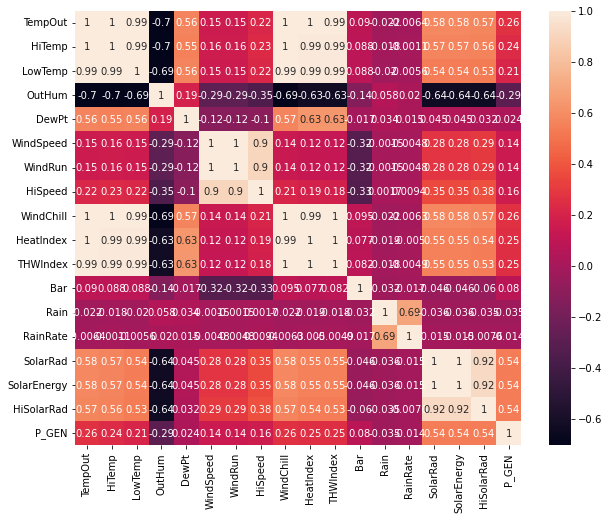

In [8]:
plt.subplots(figsize = (10, 8))
sns.heatmap(UK_data.corr(), annot = True);

Solar radiation and solar energy are the most positively correlated to power generated, obviously. We also see a negative correlations to P_GEN with humidity. The index values (Heat index, wind chill, thw index) also have decent correlation to P_GEN. The features are generally quite correlated with one another, which is to be expected with weather factors.

We have a few features recording the max value of other features: HiSolarRad, HiSpeed, HiTemp. As a result, these features are extremely correlated to their counterparts. Temp and Wind speed are also highly correlated. Let's drop the high features (and LowTemp), since they are not as descriptive of the entire time period as the other measurements.

In [9]:
UK_data.drop(columns = ['HiTemp', 'LowTemp', 'HiSpeed', 'HiSolarRad'], inplace = True)

#### 5.3 Indexes vs Power <a id='5.3_Indexes_vs_Power'></a>

HeatIndex, WindChill, and THWIndex are all combinations of either relative humidity, temperature, wind speed, or solar radiation. Let's look at the relationship between these columns and P_GEN. <br>
The following function is from the Guided Capstone provided by Springboard

In [10]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'P_GEN', data=UK_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Power Generated')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

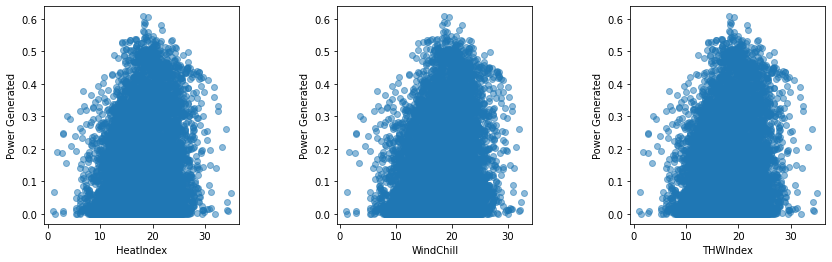

In [11]:
scatterplots(['HeatIndex', 'WindChill', 'THWIndex'], figsize = (14, 4))

For all of these features, around 18 degrees Celsius seems to be the sweet spot of power generation. We can assume that too much moisture, too much heat, or too much wind would have a significant effect on solar panels

### 6 Target Variable <a id='6_Target_Variable'></a>

#### 6.1 Histograms <a id='6.1_Histograms'></a>

Let's look at the relationships between all of our variables and the target variable, P_GEN.

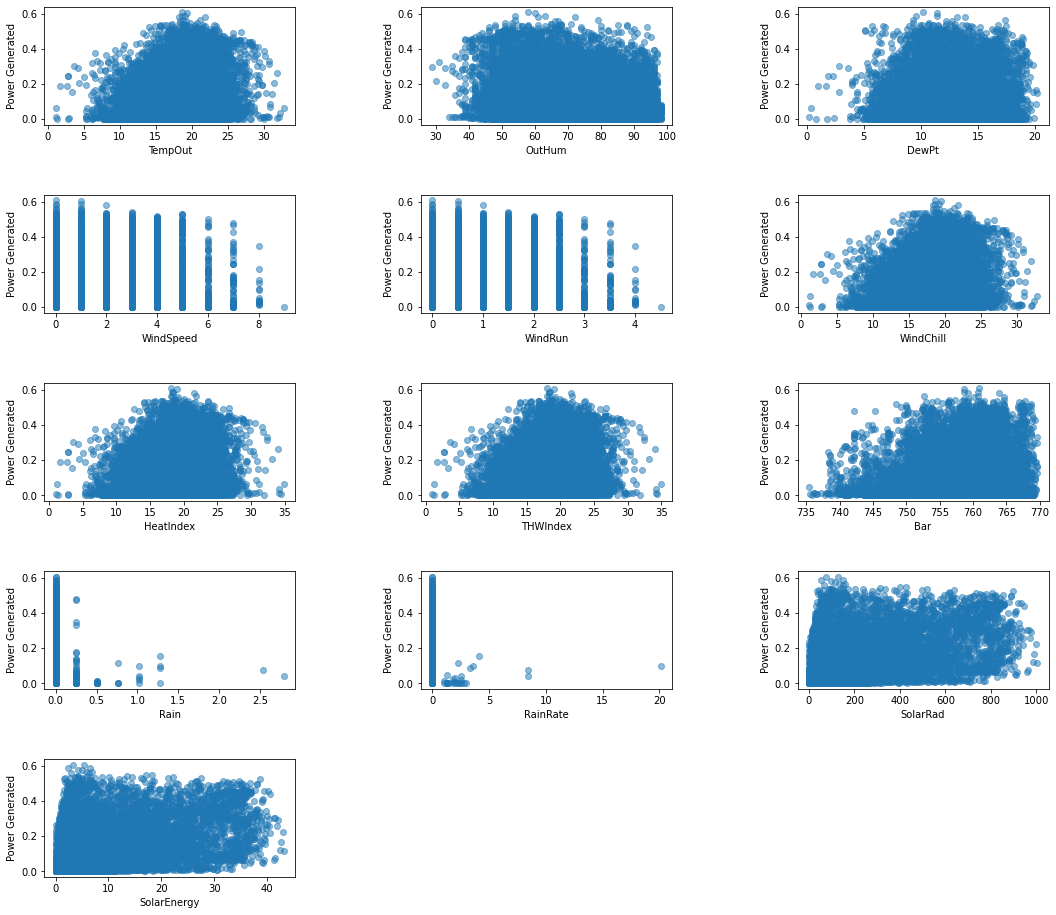

In [12]:
scatterplots(list(UK_data.drop(columns=['P_GEN', 'Site']).columns), ncol = 3, figsize = (18,16))

#### 6.2 New Features <a id='6.2_New_Features'></a>

A lot of these relationships are not very clear. Let's see if we can create some new variables to explain our target variable. Let's start off by creating a new column of the ratio of temperature to pressure

In [13]:
UK_data['Temp_Pressure_ratio'] = UK_data['TempOut'] / UK_data['Bar']

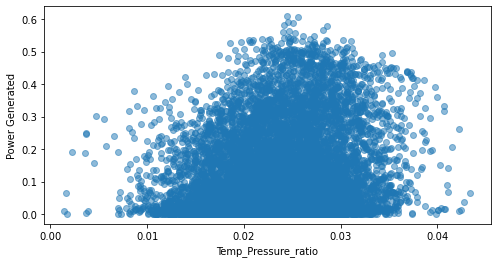

In [14]:
scatterplots(['Temp_Pressure_ratio'], figsize = (8, 4))

Once again we see a normal distribution. Let's see humidity and radiation.

In [15]:
UK_data['Humidity_Radiation_ratio'] = UK_data['OutHum'] / UK_data['SolarRad']

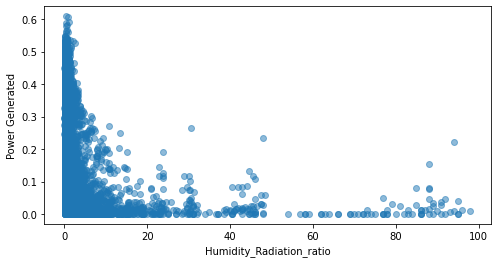

In [16]:
scatterplots(['Humidity_Radiation_ratio'], figsize = (8, 4))

#### 6.3 P_GEN <a id='6.3_P_GEN'></a>

Let's explore our target variable a little more. We'll start by looking at a box plot.

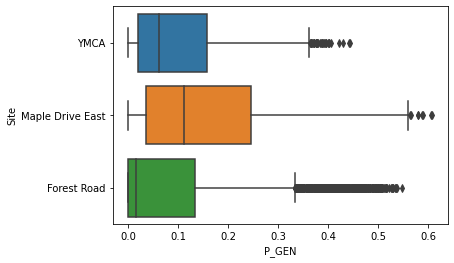

In [17]:
sns.boxplot(data=UK_data, x = 'P_GEN', y = 'Site');

Forest Road has a lot of outliers. Let's look at the other features for Forest Road and see if we see outliers there as well

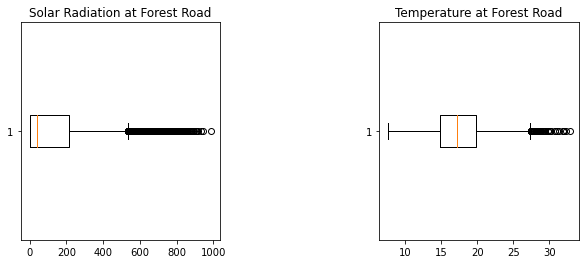

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.subplots_adjust(wspace = 0.8)
ax[0].boxplot(UK_data[UK_data['Site'] == 'Forest Road']['SolarRad'], vert = False)
ax[0].set_title('Solar Radiation at Forest Road')
ax[1].boxplot(UK_data[UK_data['Site'] == 'Forest Road']['TempOut'], vert = False)
ax[1].set_title('Temperature at Forest Road');

Well, Looks like we have a similar number of outliers for the other features, as well. This means we can reasonably assume that P_GEN outliers are a result of some particularly good days in terms of weather needed to generated power, and not because of error.

### 7 Save Data  <a id='7_Save_Data'></a>

In [19]:
datapath = '../data'
save_file(UK_data, 'UK_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/UK_data.csv"


### 8 Conclusion <a id='8_Conclusion'></a>

We came into this step with pretty clean data, so not much extra work was needed on that end. This step was useful, however, to take a closer look at the relationships between our many features. <br>
<br>
In this notebook, we looked into the correlations between our features. As could be expected, weather factors are quite interconnected. Temperature, humidity, solar radiation, all effect eachother, and in turn effect the power that can be generated by a solar panel. We did not see any strong correlations to our target variable (over 0.8). However, it was clear that humidity and solar radiation play a huge role. We also created some new features from our old ones, taking the ratio. These new features could help our model get a better understanding of our target feature. <br>
<br>
Finally, we looked at our target feature, P_GEN. Forest Road had a lot of outliers, which is initially worrying. However, after looking at the other features at forest road, the P_GEN outliers seem to be explained by the other features. This is quite a relief. Having too many outliers that can't be explained could ruin our chances of training a successful model. <br>
<br>
We are now ready to start training our model!